## dataset information 
 - lsoa_code:  code for Lower Super Output Area in Greater London <br> 
 - borough: Common name for London borough<br> 
 - major_category: High level categorization of crime<br> 
 - minor_category: Low level categorization of crime within major category<br> 
 - value: monthly reported count of categorical crime in given borough<br> 
 - year: Year of reported counts, 2008-2016<br> 
 - month: Month of reported counts, 1-12

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sys
import os
import geopandas as gpd

In [47]:
crime_rate = pd.read_csv('datasets/london_crime_by_lsoa.csv')

## Basic information

In [45]:
print('first five rows of the dataset : ')
crime_rate.head()

first five rows of the dataset : 


,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [21]:
print('number of rows : ', crime_rate.shape[0])
print('number of columns : ', crime_rate.shape[1])

number of rows :  13490604
number of columns :  7


In [25]:
print("data type : ")
crime_rate.dtypes

data type : 


lsoa_code         object
borough           object
major_category    object
minor_category    object
value              int64
year               int64
month              int64
dtype: object

## Missing data

In [35]:
crime_rate.isnull().values.any()   #check if there is missing values in the dataset

False

## Statistical information

In [64]:
crime_rate.nunique()  #number of unique values in each column

lsoa_code         4835
borough             33
major_category       9
minor_category      32
value              247
year                 9
month               12
dtype: int64

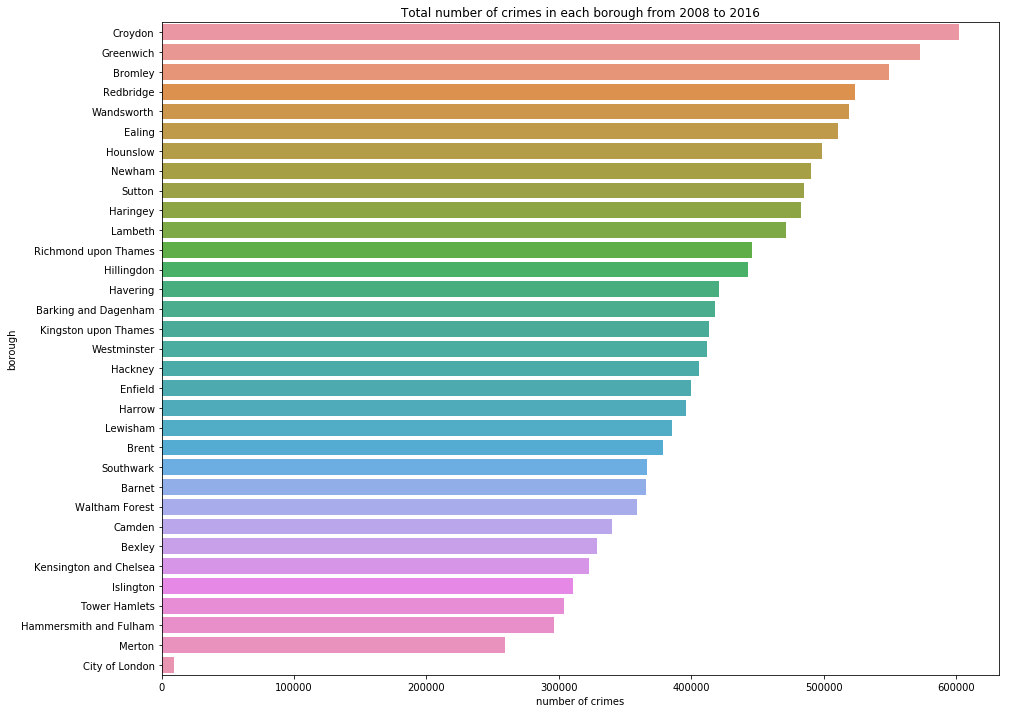

In [44]:
ax = sns.barplot(y = crime_rate.borough.unique(), x=crime_rate.borough.value_counts(), data=crime_rate)
ax.set_title('Total number of crimes in each borough from 2008 to 2016')
ax.set_xlabel('number of crimes')
ax.set_ylabel('borough')
plt.show()

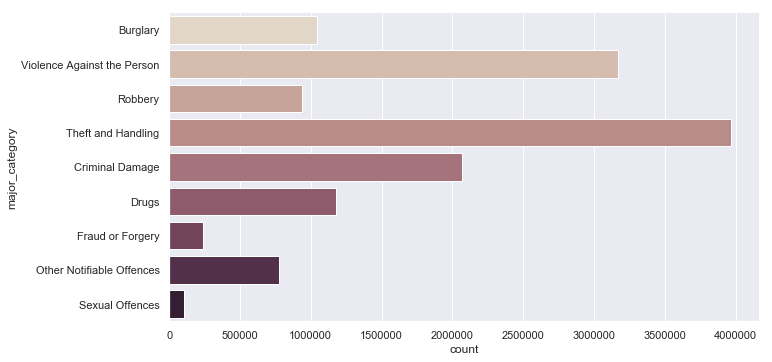

In [64]:
ax = sns.catplot(y = 'major_category', kind='count', palette="ch:.25", data = crime_rate,  aspect=18/8.27)

In [65]:
crime_rate.minor_category.value_counts()

Other Theft                               522180
Theft From Motor Vehicle                  522180
Common Assault                            522180
Theft/Taking Of Motor Vehicle             522072
Burglary in Other Buildings               522072
Harassment                                522072
Criminal Damage To Motor Vehicle          521964
Assault with Injury                       521856
Other Criminal Damage                     521856
Possession Of Drugs                       521748
Burglary in a Dwelling                    521532
Criminal Damage To Dwelling               521424
Personal Property                         520668
Motor Vehicle Interference & Tampering    520452
Other Notifiable                          519696
Other Theft Person                        519480
Wounding/GBH                              519372
Theft/Taking of Pedal Cycle               516996
Other violence                            512028
Criminal Damage To Other Building         503928
Drug Trafficking    

## Map  (haven't decided what to show on the map)

In [38]:
map_image = gpd.read_file('datasets/ESRI/London_Borough_Excluding_MHW.shp')

In [41]:
map_image.head()

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.2 159504.7, 535005.5 159502, ..."
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.6 157530.4, 540361.2 157551.9..."
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.8 178100, 521967.7 178096.8, ..."
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.5 182881.6, 510249.9 182886, ..."


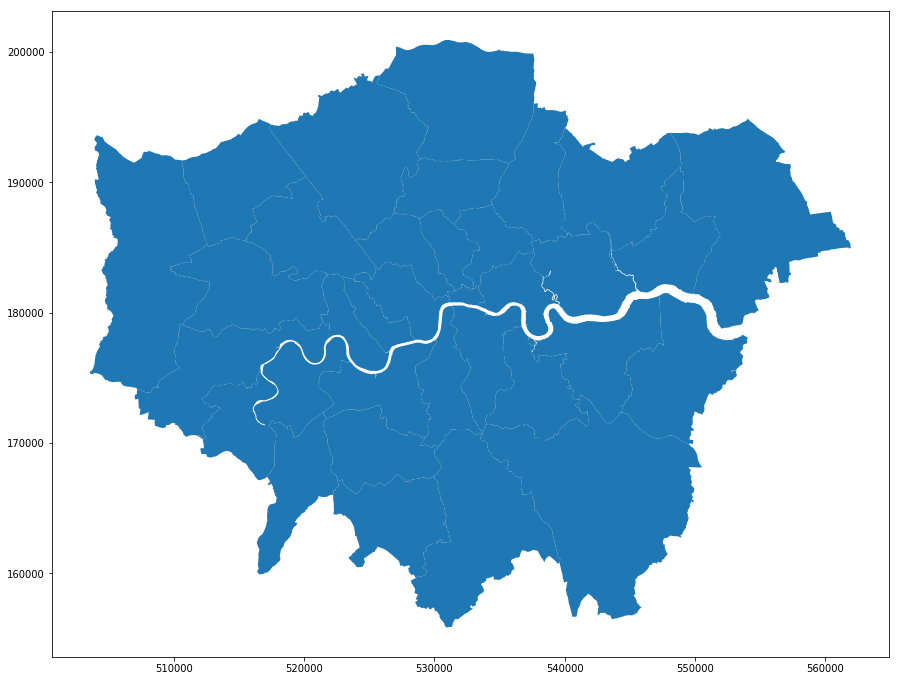

In [37]:
plt.rcParams["figure.figsize"] = [15,12]
map_bor.plot()
plt.show()